In [1]:
import pandas as pd
import seaborn as sns

In [13]:
path = './data/Table_S1.txt'
df = pd.read_csv(path, sep='\t')

/Users/jonathanlifferth/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
df.shape

(55844, 73)

In [20]:
cols = df.columns
for i, col in enumerate(cols):
    print(i, col)

0 donor_unique_id
1 Chr
2 Start
3 End
4 Intrchr. SVs
5 Total SVs (intrachr. + transl.)
6 SVs in sample
7 Nb. DEL
8 Nb. DUP
9 Nb. h2hINV
10 Nb. t2tINV
11 Nb. TRA
12 P fragment joints
13 P chr breakpoint enrichment
14 Nb. CN segments
15 P exponential dist
16 P exponential dist. cluster
17 CN segments
18 Nb. oscillating CN
19 Nb. oscillaring CN 3 states
20 CN segments chr.
21 Nb. oscillating chr.
22 Nb. oscillating chr 3 states
23 PGA sample
24 PGA chr.
25 PGNA chr.
26 clustered APOBEC mutations (<2.5 Kb)
27 CN mode 1
28 CN mode 2
29 wgs_exclusion_white_gray
30 dcc_project_code
31 Other interacting chromothripsis regions
32 FDR fragment joints intrachr. SVs and TRA
33 FDR chr breakpoint enrichment
34 FDR exponential dist.
35 FDR exponential dist. cluster
36 FDR fragment joints intrachr. SVs
37 chromo
38 chromo_label
39 tissue.x
40 donor_idx
41 tissue2
42 purity
43 ploidy
44 histo
45 type_chromothripsis
46 Nb. breakpoints in chromosome
47 Fraction SVs in chromothripsis
48 TP53_mutations
49

In [22]:
df.tail()

,donor_unique_id,Chr,Start,End,Intrchr. SVs,Total SVs (intrachr. + transl.),SVs in sample,Nb. DEL,Nb. DUP,Nb. h2hINV,...,tobacco_smoking_intensity,alcohol_history,alcohol_history_intensity,donor_wgs_included_excluded,histology_abbreviation,tissue.y,code,event,response,comment
55839,UCEC-US::ffaa98a0-2b69-46dc-aee5-c5c3f2abbc38,19,NaN,NaN,0,0,2,0,0,0,...,NaN,NaN,NaN,Included,Uterus-AdenoCA,UCEC,US,0,65.89,NaN
55840,UCEC-US::ffaa98a0-2b69-46dc-aee5-c5c3f2abbc38,20,15857291.0,16169083.0,1,1,2,0,1,0,...,NaN,NaN,NaN,Included,Uterus-AdenoCA,UCEC,US,0,65.89,NaN
55841,UCEC-US::ffaa98a0-2b69-46dc-aee5-c5c3f2abbc38,21,NaN,NaN,0,0,2,0,0,0,...,NaN,NaN,NaN,Included,Uterus-AdenoCA,UCEC,US,0,65.89,NaN
55842,UCEC-US::ffaa98a0-2b69-46dc-aee5-c5c3f2abbc38,22,NaN,NaN,0,0,2,0,0,0,...,NaN,NaN,NaN,Included,Uterus-AdenoCA,UCEC,US,0,65.89,NaN
55843,UCEC-US::ffaa98a0-2b69-46dc-aee5-c5c3f2abbc38,X,NaN,NaN,0,0,2,0,0,0,...,NaN,NaN,NaN,Included,Uterus-AdenoCA,UCEC,US,0,65.89,NaN


In [25]:
from collections import Counter

In [26]:
Counter(df[cols[67]])

Counter({'Bladder-TCC': 529,
         'Bone-Osteosarc': 782,
         'Bone-Benign': 299,
         'Bone-Epith': 230,
         'Breast-AdenoCA': 4370,
         'Breast-LobularCA': 299,
         'Breast-DCIS': 69,
         'Biliary-AdenoCA': 759,
         'Cervix-SCC': 414,
         'Cervix-AdenoCA': 46,
         'Lymph-CLL': 1978,
         'Myeloid-MPN': 161,
         'Myeloid-MDS': 23,
         'ColoRect-AdenoCA': 1196,
         'Lymph-BNHL': 2415,
         'Prost-AdenoCA': 4301,
         'Eso-AdenoCA': 1978,
         'Stomach-AdenoCA': 1518,
         'CNS-GBM': 874,
         'Head-SCC': 1265,
         'Kidney-ChRCC': 897,
         'Kidney-RCC': 3059,
         'Myeloid-AML': 184,
         'CNS-Oligo': 391,
         'Liver-HCC': 7153,
         'Lung-AdenoCA': 828,
         'Lung-SCC': 1081,
         'Skin-Melanoma': 2438,
         'Ovary-AdenoCA': 2507,
         'Panc-AdenoCA': 5244,
         'Panc-Endocrine': 1564,
         'CNS-Medullo': 2806,
         'CNS-PiloAstro': 1794,
        

In [42]:
Nb_breakpoints_in_chromosome = dict(Counter(df[cols[46]]))
Nb_breakpoints_in_chromosome = dict(sorted(Nb_breakpoints_in_chromosome.items(), key=lambda item: item[1], reverse=True))
Nb_breakpoints_in_chromosome

{0: 29684,
 2: 7618,
 4: 5026,
 6: 2377,
 8: 1597,
 10: 916,
 5: 733,
 12: 732,
 7: 703,
 9: 575,
 14: 493,
 11: 416,
 13: 367,
 16: 343,
 3: 307,
 18: 279,
 15: 251,
 20: 242,
 17: 210,
 19: 193,
 22: 179,
 24: 154,
 21: 144,
 26: 123,
 23: 116,
 28: 105,
 25: 96,
 27: 87,
 30: 82,
 31: 73,
 32: 69,
 38: 58,
 33: 53,
 34: 49,
 29: 48,
 42: 46,
 36: 46,
 35: 46,
 40: 45,
 37: 38,
 39: 38,
 48: 35,
 43: 33,
 44: 29,
 41: 28,
 52: 25,
 50: 24,
 45: 24,
 46: 23,
 49: 19,
 64: 19,
 47: 18,
 56: 17,
 60: 17,
 88: 17,
 58: 16,
 57: 15,
 55: 15,
 68: 14,
 78: 14,
 51: 13,
 53: 13,
 54: 13,
 59: 13,
 61: 13,
 66: 12,
 76: 12,
 80: 12,
 82: 11,
 99: 11,
 71: 11,
 70: 10,
 79: 10,
 84: 10,
 69: 10,
 86: 10,
 115: 9,
 62: 9,
 75: 9,
 67: 9,
 72: 9,
 83: 9,
 89: 9,
 128: 9,
 96: 8,
 65: 8,
 63: 8,
 77: 8,
 90: 7,
 98: 7,
 81: 7,
 85: 6,
 133: 6,
 109: 6,
 100: 6,
 92: 6,
 104: 6,
 93: 5,
 94: 5,
 97: 5,
 120: 5,
 117: 5,
 106: 5,
 95: 5,
 87: 5,
 110: 5,
 129: 4,
 101: 4,
 127: 4,
 91: 4,
 145: 4,

In [51]:
keys = list(Nb_breakpoints_in_chromosome.keys())
values = list(Nb_breakpoints_in_chromosome.values())

Nb_breakpoints_in_chromosome_df = pd.DataFrame(list(zip(keys, values)))
Nb_breakpoints_in_chromosome_df[1:]

,0,1
1,2,7618
2,4,5026
3,6,2377
4,8,1597
5,10,916
...,...,...
282,231,1
283,486,1
284,107,1
285,272,1


<AxesSubplot:xlabel='0', ylabel='1'>

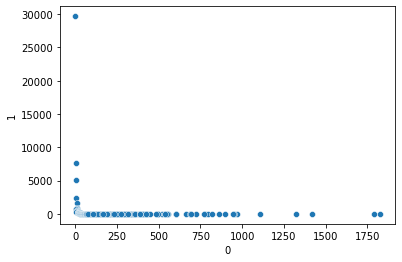

In [60]:
sns.scatterplot(data=Nb_breakpoints_in_chromosome_df, x=0, y=1)

<AxesSubplot:xlabel='Nb. breakpoints in chromosome', ylabel='Density'>

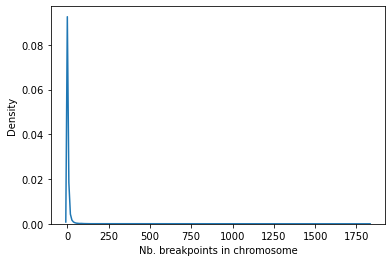

In [64]:
sns.kdeplot(data=df[cols[46]])

In [66]:
df[cols[46]].max()

1824

In [78]:
df[df[cols[46]] == 1824]

,donor_unique_id,Chr,Start,End,Intrchr. SVs,Total SVs (intrachr. + transl.),SVs in sample,Nb. DEL,Nb. DUP,Nb. h2hINV,...,tobacco_smoking_intensity,alcohol_history,alcohol_history_intensity,donor_wgs_included_excluded,histology_abbreviation,tissue.y,code,event,response,comment
51968,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,12,2301723.0,133385530.0,615,1209,1635,164,138,161,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN


In [81]:
df[df[cols[0]] == 'SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d']

,donor_unique_id,Chr,Start,End,Intrchr. SVs,Total SVs (intrachr. + transl.),SVs in sample,Nb. DEL,Nb. DUP,Nb. h2hINV,...,tobacco_smoking_intensity,alcohol_history,alcohol_history_intensity,donor_wgs_included_excluded,histology_abbreviation,tissue.y,code,event,response,comment
51957,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,1,NaN,NaN,0,0,1635,0,0,0,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51958,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,2,NaN,NaN,0,0,1635,0,0,0,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51959,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,3,4159559.0,20777597.0,14,107,1635,4,3,5,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51960,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,4,127090720.0,151907883.0,30,49,1635,4,8,11,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51961,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,5,492905.0,14929135.0,16,100,1635,9,4,3,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51962,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,6,29105248.0,126918492.0,12,206,1635,3,3,3,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51963,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,7,77961769.0,133784786.0,8,121,1635,1,3,2,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51964,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,8,36818890.0,48127350.0,3,74,1635,1,0,1,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51965,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,9,103346393.0,140789888.0,50,78,1635,9,13,16,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
51966,SARC-US::39f68467-3d37-4b19-aa43-ed7b120c619d,10,NaN,NaN,0,0,1635,0,0,0,...,NaN,NaN,NaN,Included,SoftTissue-Liposarc,SARC,US,1,9.05,NaN
